## Read the file

In [1]:
stu_pf <- read.csv("C:/Users/eddie/OneDrive/文档/GitHub/coding-stuff-I-make-from-learning/R/lab7/StudentsPerformance.csv")
View(stu_pf)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78
female,group B,some college,standard,completed,88,95,92
male,group B,some college,free/reduced,none,40,43,39
male,group D,high school,free/reduced,completed,64,64,67


## ISSUE：不同族群對於數學成績是否有差異

### 畫出盒狀圖（x-各族群、y-數學成績）

In [2]:
library(ggplot2)

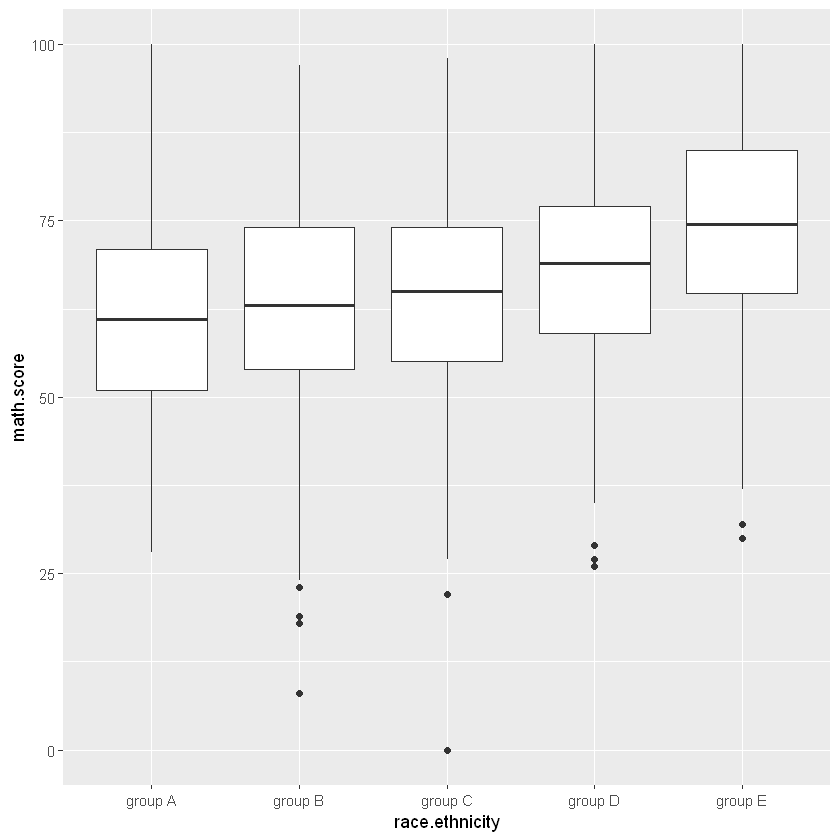

In [3]:
ggplot(stu_pf, aes(x = race.ethnicity, y = math.score)) +
    geom_boxplot()

### 跑ANOVA前須檢查是否有符合三個條件
* (1) 常態性：樣本必須符合常態分配，也就是分配至少要長得差不多，奇形怪狀的分配是沒辦法比較的。
* (2) 同質性：各組變異數必須相等或接近，也就是兩組常態分配曲線的高矮胖瘦要差不多，差太多代表長得不一樣，不一樣的東西怎麼能比較呢。
* (3) 獨立性：樣本要有獨立性，也就是抽樣一定要隨機。


#### (1) 常態性檢查
* 使用shapiro.test：
* 在 R 中若要進行常態性檢定，最常用的方式就是 Shapiro-Wilk 檢定
* shapiro.test函數檢查資料是否為常態分布。
* p-value > 0.05，不拒絕虛無假設，資料符合常態分布。
* p-value < 0.05，拒絕虛無假設，資料不符合常態分布。

In [4]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### 看各族群的數學成績是否符合常態分佈

In [5]:
stu_pf %>%
    group_by(race.ethnicity) %>%
    summarize(p_value = shapiro.test(math.score)$p.value)

race.ethnicity,p_value
<chr>,<dbl>
group A,0.85453195
group B,0.01038943
group C,0.01741477
group D,0.05926829
group E,0.01849372


#### (2) 同質性檢查
* 使用leveneTest：
* 確認不同組別數值是否變異數相等。
* p-value > 0.05，資料數值符合相同變異數。
* p-value < 0.05，資料數值不符合相同變異數。

In [6]:
library(car)

Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




In [7]:
leveneTest(math.score ~ race.ethnicity, stu_pf)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,0.5902872,0.6697371
,995,NA,NA


output P = 0.6697

## ANOVA
### 不同族群對於數學成績是否有差異?
* H0: A = B = C = D = E (math.score)。
* HA: Otherwise

#### ANOVA在R裡面有兩種寫法

In [8]:
# 寫法一
aov_race <- aov(math.score ~ race.ethnicity, data = stu_pf)
summary(aov_race)

                Df Sum Sq Mean Sq F value   Pr(>F)    
race.ethnicity   4  12729    3182   14.59 1.37e-11 ***
Residuals      995 216960     218                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [9]:
# 寫法二
oneway.test(math.score ~ race.ethnicity, data = stu_pf, var.equal = TRUE)


	One-way analysis of means

data:  math.score and race.ethnicity
F = 14.594, num df = 4, denom df = 995, p-value = 1.373e-11


p-value 具顯著性，拒絕H0，

## Follow-up analysis
* Apply TukeyHSD() in R
* TukeyHSD() document ->
* https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/TukeyHSD

* The intervals constructed in this way would only apply exactly to balanced designs where there are the same number of observations made at each level of the factor.

* This function incorporates an adjustment for sample size that produces sensible intervals for mildly unbalanced designs.

* 懶人包：treatment的sample size就算沒有一致，一樣能使用TukeyHSD()

In [10]:
result <- TukeyHSD(aov_race, conf.level = 0.95)
result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = math.score ~ race.ethnicity, data = stu_pf)

$race.ethnicity
                     diff         lwr       upr     p adj
group B-group A  1.823418 -3.35997818  7.006814 0.8723586
group C-group A  2.834736 -2.00279565  7.672268 0.4968040
group D-group A  5.733382  0.78239222 10.684372 0.0138238
group E-group A 12.192215  6.72151591 17.662914 0.0000000
group C-group B  1.011318 -2.68671543  4.709352 0.9451894
group D-group B  3.909964  0.06470228  7.755225 0.0440476
group E-group B 10.368797  5.87410158 14.863492 0.0000000
group D-group C  2.898646 -0.46589828  6.263189 0.1289617
group E-group C  9.357479  5.26646348 13.448494 0.0000000
group E-group D  6.458833  2.23426347 10.683403 0.0003084


### 使y軸的標題為橫向使用 las=1

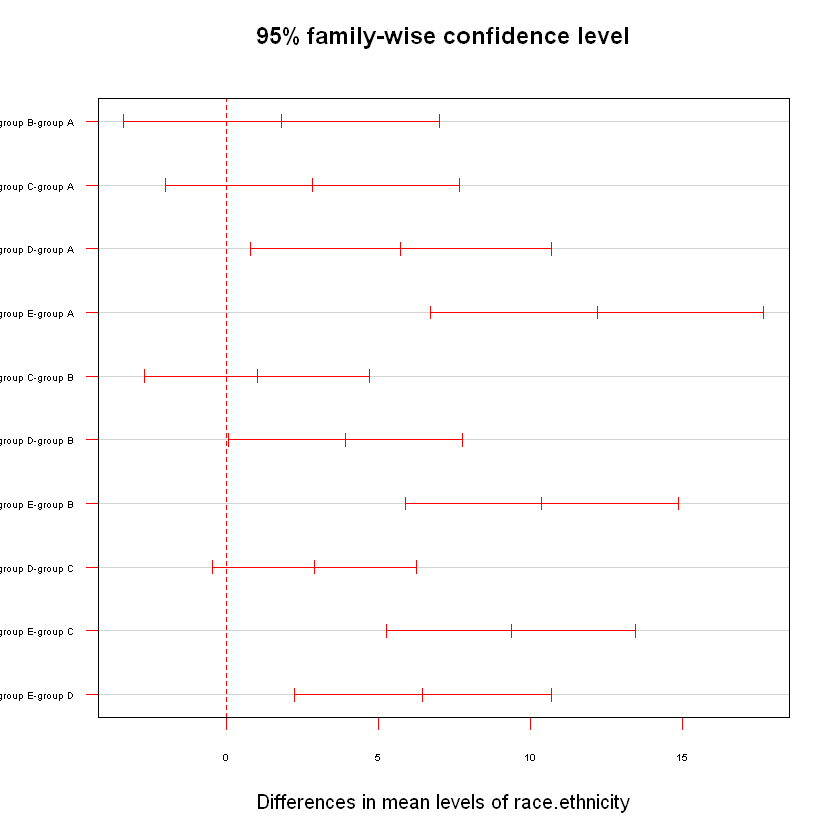

In [11]:
plot(result, las = 1, col = "red", cex.axis = 0.5)